In [5]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [29]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 MB 4.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
DEVICE = torch.device("cuda" if torch.cuda.is_available()
                      else "cpu")
print(f"Using {DEVICE} backend")

Using cpu backend


In [7]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())


In [37]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = 128,
                                             shuffle = True,drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = 25, 
                                      shuffle = False)

In [41]:
test_G,label_test_G=next(iter(test_loader))
# test data for testing the generator

In [42]:
z_test_G = torch.randn(25, 64).to(DEVICE)

In [9]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                #transforms.Normalize((0.5,),(0.5,)),
])

In [11]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 5.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image


In [13]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
# MNIST image size is 1*28*28
img_size = images.shape[2]
print(images.shape)

torch.Size([128, 1, 28, 28])


In [15]:
class generator_def(nn.Module):
   #zd=64+10
  def __init__(self, input_size=64):
    # initalize super module
    super(generator_def, self).__init__()

   
    
    
    self.func_gen_layer = nn.Sequential(nn.ConvTranspose2d(in_channels=64+10, out_channels=64, kernel_size=3,
                                                  stride=2, padding=0, bias=False),
                               
                               nn.BatchNorm2d(64),
                               nn.Tanh(),
                               
                             
                               nn.ConvTranspose2d(in_channels=64, out_channels=128, kernel_size=4,
                                                  stride=1, padding=0, bias=False),
                               nn.BatchNorm2d(128), 
                              

                               nn.Tanh(),
                             
                               nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3,
                                                  stride=2, padding=0, bias=False),
                               nn.BatchNorm2d(64),
                               
                               nn.Tanh(),
                             
                               nn.ConvTranspose2d(in_channels=64, out_channels=1, kernel_size=4,
                                                  stride=2, padding=0, bias=False),
                             
                               nn.BatchNorm2d(1),
                               nn.ReLU())
    
  def forward(self, x, y):
   
    x = x.view(x.shape[0], x.shape[1], 1, 1)
   
    
   
    y = y.view(y.shape[0], y.shape[1], 1, 1)
  
    output = torch.cat([x,y], dim=1)
   
    output = self.func_gen_layer(output)
  
    return output

In [16]:
class discriminator_def(nn.Module):
  
  def __init__(self):
    # initalize super module
    super(discriminator_def, self).__init__()
    
    
    self.layer_disc = nn.Sequential(nn.Conv2d(in_channels=11, out_channels=64,
                                            kernel_size=4, stride=2, padding=0, bias=False),
                               
                               nn.BatchNorm2d(64),
                              
                               nn.LeakyReLU(0.2, inplace=True),
                              
                               nn.Conv2d(in_channels=64, out_channels=128,
                                         kernel_size=4, stride=2, padding=0, bias=False),
                              
                               nn.BatchNorm2d(128),
                               
                               nn.LeakyReLU(0.2, inplace=True),
                              
                               nn.Conv2d(in_channels=128, out_channels=1,
                                         kernel_size=4, stride=2, padding=0, bias=False),
                              
                               nn.BatchNorm2d(1),
                              
                               nn.Sigmoid()
                               )
  
  def forward(self, x, y):
   
    output = torch.cat([x,y], dim=1)
    
    output = self.layer_disc(output)
   
    output = output.view(output.shape[0], -1)
   
    return output


In [17]:
def weights_init(net):
    classname = net.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(net.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(net.weight.data, 1.0, 0.02)
        nn.init.constant_(net.bias.data, 0)


In [18]:
Generator = generator_def().to(DEVICE)
print(Generator)


Generator(
  (layer_xy): Sequential(
    (0): ConvTranspose2d(74, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): ConvTranspose2d(64, 128, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Tanh()
    (9): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (10): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
)


In [19]:
Discriminator = discriminator_def().to(DEVICE)
print(Discriminator)

Discriminator(
  (layer_x): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer_y): Sequential(
    (0): Conv2d(10, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer_xy): Sequential(
    (0): Conv2d(11, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Conv2d(128, 1, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (7): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Sigmoid()
  )
)


In [20]:
Discriminator.apply(weights_init)
Generator.apply(weights_init)


Generator(
  (layer_xy): Sequential(
    (0): ConvTranspose2d(74, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): ConvTranspose2d(64, 128, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Tanh()
    (6): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Tanh()
    (9): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (10): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
  )
)

In [22]:
epoch_num = 20

size_z = 64


Adam_lr = 0.0002 

Adam_beta1 = 0.5 


In [23]:
criterion = nn.BCEWithLogitsLoss()

optimizerG = torch.optim.Adam(Generator.parameters(), lr=Adam_lr, betas=(Adam_beta1, 0.999))
 
optimizerD = torch.optim.Adam(Discriminator.parameters(), lr=Adam_lr, betas=(Adam_beta1, 0.999))


In [24]:
# generating labels for giving it as input to the generator where 1 stands for real class
labels_real = torch.ones((128, 1)).to(DEVICE)
# generating fake labels for the fake images
labels_fake = torch.zeros((128, 1)).to(DEVICE)
# Generating random noise samples
z_test = torch.randn(100, 64).to(DEVICE)

In [25]:
# encode_onehot encoding of labels
encode_onehot = torch.zeros(10, 10).scatter_(1, torch.tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).view(10,1), 1)
# Reshaping the cm to (10,10,28,28)
cm = torch.zeros([10, 10, img_size, img_size])
#channels for the respective labels will be set to one 
for i in range(10):
    cm[i, i, :, :] = 1


In [26]:
D_losses = []
G_losses = []



In [27]:
Generator.train()
Discriminator.train()

Discriminator(
  (layer_x): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer_y): Sequential(
    (0): Conv2d(10, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer_xy): Sequential(
    (0): Conv2d(11, 64, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Conv2d(128, 1, kernel_size=(4, 4), stride=(2, 2), bias=False)
    (7): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Sigmoid()
  )
)

In [31]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [43]:
import torchvision

In [45]:
for epoch in range(30):
  loss_e_d = []
  loss_e_g = []
 
  
  for images, y_labels in train_loader:
   
   
  #First passing real images to discriminator
    
    real_data = images.to(DEVICE)
    #print("real_images to the discr",real_data.shape)
   

    
    labels_disc_real = cm[y_labels].to(DEVICE)
    
    real_pred_dis = Discriminator(real_data, labels_disc_real).to(DEVICE)
    
    #passing real images to discriminator

    real_D_loss = criterion(real_pred_dis, labels_real).to(DEVICE)###############
    
    
    z = torch.randn(128, 64).to(DEVICE)
    # create random y labels for generator
    fake_image_label_g = (torch.rand(128, 1)*10).type(torch.LongTensor).squeeze()
    # convert genarator labels to onehot
    encoded_label_fake_G = encode_onehot[fake_image_label_g].to(DEVICE)
    # preprocess labels for feeding as y input in D
    # reshaping the output to 10,10,28,28
    DG_y = cm[fake_image_label_g].to(DEVICE)
    
    # generating image for discriminator
    fake_image = Generator(z, encoded_label_fake_G).to(DEVICE)
    
    z_preds = Discriminator(fake_image.detach(), DG_y).to(DEVICE)#############
    
    D_fake_loss = criterion(z_preds, labels_fake)
  
    D_loss = real_D_loss + D_fake_loss
    
   
    loss_e_d.append(D_loss.item())
    
    
    # zero accumalted grads
    Discriminator.zero_grad()
    # do backward pass
    D_loss.backward()
    # update discriminator model
    optimizerD.step()
    
    ##Updating Generator network
        
    
    
      
    d_g_x = Discriminator(fake_image, DG_y)
     
    G_loss = criterion(d_g_x, labels_real)
      
    
    loss_e_g.append(G_loss)
      
      
    Discriminator.zero_grad()
      
    G_loss.backward()
      # update generator model
    optimizerG.step()
    
    D_losses.append(sum(loss_e_d)/len(loss_e_d))
    G_losses.append(sum(loss_e_g)/len(loss_e_g))
    
    
    print(f" Epoch {epoch+1}/{30} Discriminator Loss {D_losses[-1]:.3f} Generator Loss {G_losses[-1]:.3f}")
        
    
    
   
    test_G_label = encode_onehot[label_test_G].to(DEVICE)
    print(epoch)
    with torch.no_grad():
      #testing generator after every epoch
      fake_test=Generator(z_test_G,test_G_label)

      #saving first and last epoch images
      if epoch==0:
        torchvision.utils.save_image(test_G, f"MNIST_epoch_1_original.jpg", nrow=5, padding=0, normalize=True)
        torchvision.utils.save_image(fake_test, f"MNIST_epoch_{epoch+1}.jpg", nrow=5, padding=0, normalize=True)
      if epoch==29:
        torchvision.utils.save_image(fake_test, f"MNIST_epoch_{epoch+1}.jpg", nrow=5, padding=0, normalize=True)
    # set generator to training mode

    Generator.train()

    PATH= "/Users/kriti/Desktop/CVAE/modelmnist_30_2ND.pt"
    torch.save({
          'epoch': epoch,
           'model_state_dict': Generator.state_dict(),
           'optimizer_state_dict': optimizerG.state_dict(),
            
            }, PATH)


 Epoch 1/30 Discriminator Loss 1.437 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.439 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.439 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Generator Loss 0.505
0
 Epoch 1/30 Discriminator Loss 1.438 Gen

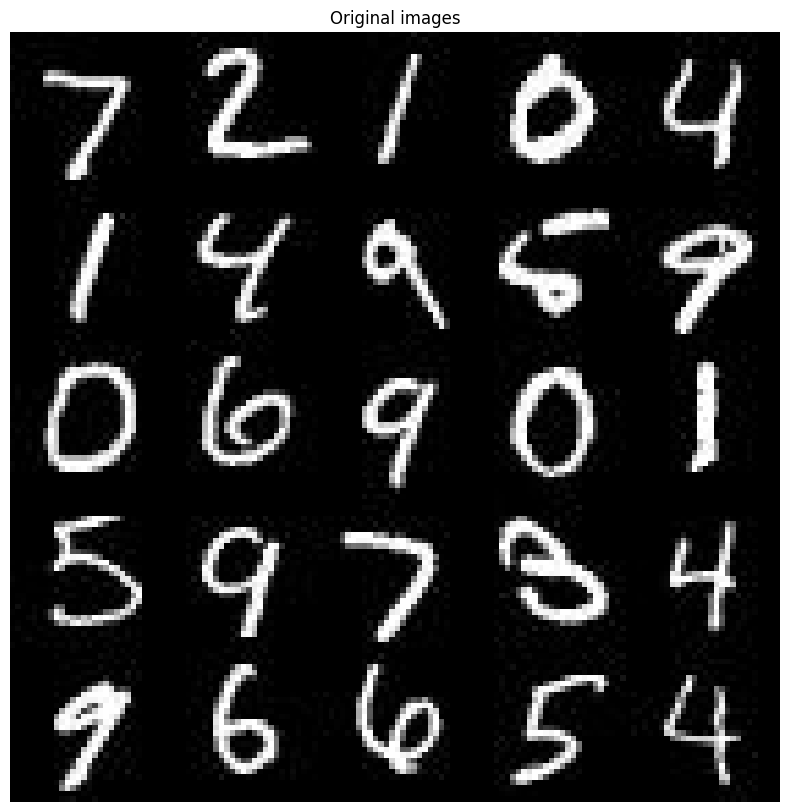

In [47]:
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Original images")

_ = plt.imshow(Image.open(f"MNIST_epoch_1_original.jpg"))


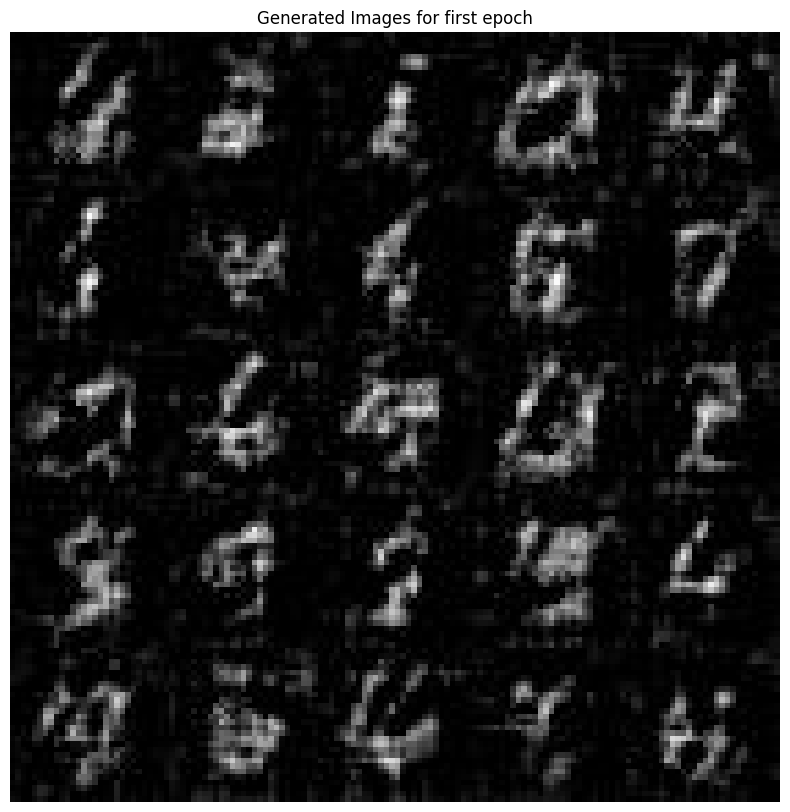

In [48]:
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Generated Images for first epoch")

_ = plt.imshow(Image.open(f"MNIST_epoch_1.jpg"))


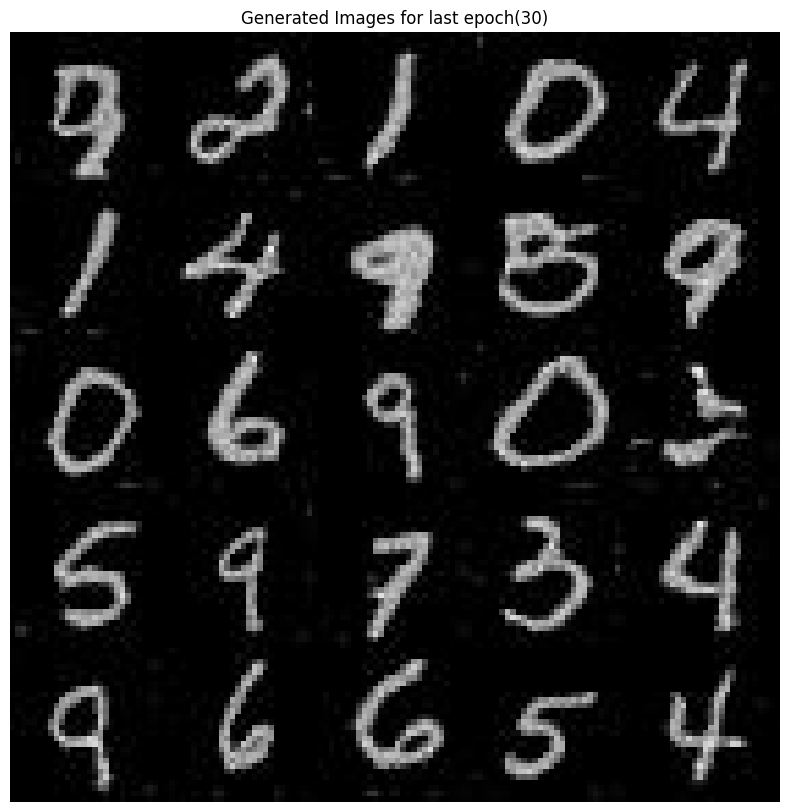

In [46]:
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Generated Images for last epoch(30)")

_ = plt.imshow(Image.open(f"MNIST_epoch_30.jpg"))


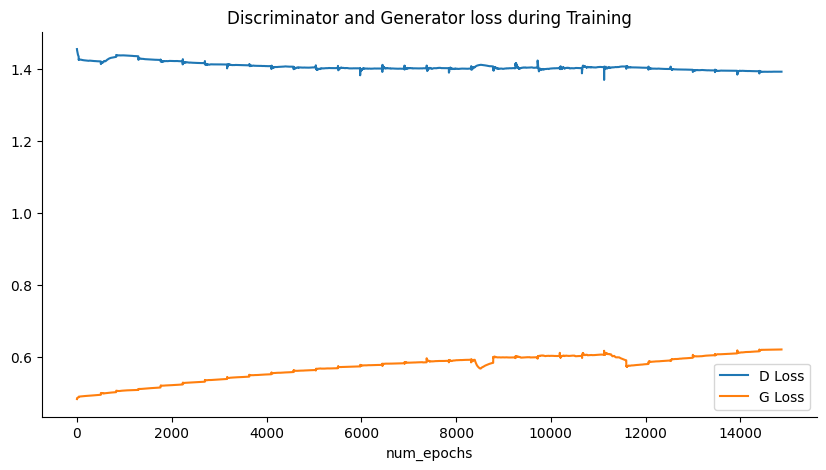

In [49]:
with torch.no_grad():
 plt.figure(figsize=(10,5))
 plt.title("Discriminator and Generator loss during Training")

 plt.plot(D_losses,label="D Loss")
 plt.plot(G_losses,label="G Loss")
 
 ax = plt.gca()
 
 ax.spines['right'].set_visible(False)
 ax.spines['top'].set_visible(False)
 
 plt.xlabel("num_epochs")
 plt.legend()
 plt.show()